In [24]:
%%capture
from catalogs import *;
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [53]:
# I will use my catalogues here and also enforce use==1 to remove poor sources
z = z_cdfs
z = z[use_cdfs ==1]
fKs = catalog_cdfs['f_Ks']
fKs = fKs[use_cdfs ==1]

In [54]:
fKs_SI = 0.3631*fKs * 10**-32  # uJy to W/m^2/Hz while considering ZP
d_L_meters = cosmo.luminosity_distance(z).to(u.m).value
L_Ks = 4 * np.pi * (d_L_meters**2) * fKs_SI # this is spectral luminosity, and for accuracy sake, let's say units of W/Hz

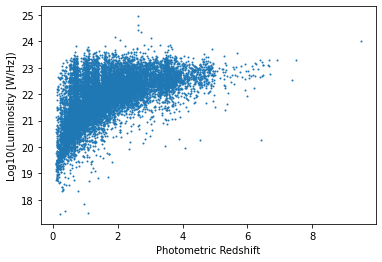

In [58]:
plt.scatter(z, np.log10(L_Ks), s=1)
plt.xlabel('Photometric Redshift')
plt.ylabel('Log10(Luminosity [W/Hz])')
plt.show()

In [60]:
mag_lim = 25.9  # AB mag limit in Ks band
f_lim = 10 ** ((mag_lim + 56.1) / -2.5)  # AB mag to to W/m^2/Hz
# other conversion factors include: 
# erg/s/Hz/cm^2 -48.6
# W/m^2/Hz -56.1
# mJy 16.4
# uJy 23.9
# nJy 31.4
# ZFOURGE 25.0

z_bins = np.linspace(0, 8, 1000)  # create some redshift bins
d_L = cosmo.luminosity_distance(z_bins).to(u.m).value
L_Ks_lim = 4 * np.pi * d_L**2 * f_lim  # Luminosity limit

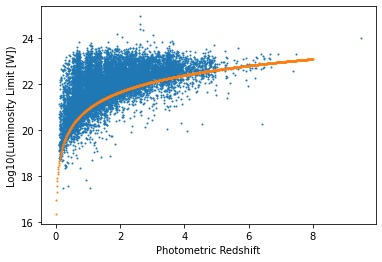

In [61]:
# Now you can plot L_Ks_lim versus redshift bins
plt.scatter(z, np.log10(L_Ks), s=1)
plt.scatter(z_bins, np.log10(L_Ks_lim), s=1)
plt.xlabel('Photometric Redshift')
plt.ylabel('Log10(Luminosity Limit [W])')
plt.show()